## Guia da Camada Física
O documento tem o objetivo de demostrar o funcionamento da camda física,além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

Será instaciada a rede e definida a topologia de Grade

2024-06-09 18:58:06,048: Qubit 0 adicionado à memória do Host 0.
2024-06-09 18:58:06,049: Qubit 0 criado com fidelidade inicial 0.6812181591497826 e adicionado à memória do Host 0.
2024-06-09 18:58:06,049: Qubit 1 adicionado à memória do Host 0.
2024-06-09 18:58:06,050: Qubit 1 criado com fidelidade inicial 0.6812181591497826 e adicionado à memória do Host 0.
2024-06-09 18:58:06,051: Qubit 2 adicionado à memória do Host 0.
2024-06-09 18:58:06,052: Qubit 2 criado com fidelidade inicial 0.6812181591497826 e adicionado à memória do Host 0.
2024-06-09 18:58:06,052: Qubit 3 adicionado à memória do Host 0.
2024-06-09 18:58:06,053: Qubit 3 criado com fidelidade inicial 0.6812181591497826 e adicionado à memória do Host 0.
2024-06-09 18:58:06,054: Qubit 4 adicionado à memória do Host 1.
2024-06-09 18:58:06,055: Qubit 4 criado com fidelidade inicial 0.6812181591497826 e adicionado à memória do Host 1.
2024-06-09 18:58:06,056: Qubit 5 adicionado à memória do Host 1.
2024-06-09 18:58:06,057: Qubit

Hosts inicializados
Canais inicializados


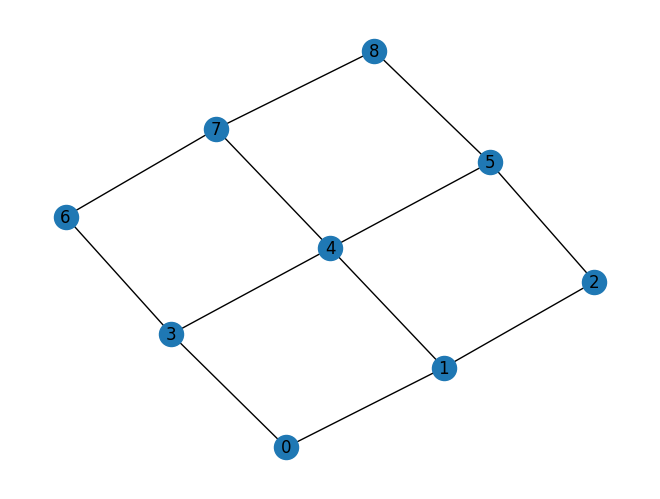

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
#Esse código basicamente seleciona aleatoriamente uma aresta do grafo da rede e imprime tanto todas as arestas quanto a aresta selecionada aleatoriamente.
arestas = list(rede.edges)
print(arestas)
aresta_aleatorias = random.sample(arestas, 1)[0]
print(aresta_aleatorias)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 6), (3, 4), (4, 7), (4, 5), (5, 8), (6, 7), (7, 8)]
(5, 8)


In [4]:

#Deseguinando quem será Alice e Bob
x,y = aresta_aleatorias
alice = rede.get_host(x)
bob = rede.get_host(y)

h1 = Qubit(1)
h2 = Qubit(2)

#Adcionando qubits aos hosts
alice.add_qubit(h1)
bob.add_qubit(h2)



2024-06-09 18:58:06,710: Qubit 1 adicionado à memória do Host 5.
2024-06-09 18:58:06,712: Qubit 2 adicionado à memória do Host 8.


In [5]:
#É possível acessar a memória dos dois hosts
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB190>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB150>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16ADAD50>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16A9D9D0>, <quantumnet.objects.qubit.Qubit object at 0x0000023A26E9C450>]
[<quantumnet.objects.qubit.Qubit object at 0x0000023A16AD7310>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16AE74D0>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16AE7690>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16AE7E50>, <quantumnet.objects.qubit.Qubit object at 0x0000023A15FD8050>]


In [6]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB190>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB150>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16ADAD50>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16A9D9D0>, <quantumnet.objects.qubit.Qubit object at 0x0000023A26E9C450>]
[<quantumnet.objects.qubit.Qubit object at 0x0000023A16AD7310>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16AE74D0>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16AE7690>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16AE7E50>, <quantumnet.objects.qubit.Qubit object at 0x0000023A15FD8050>]


In [7]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

[<quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB190>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB150>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16ADAD50>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16A9D9D0>]
Qubit 1 with state None


In [8]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-06-09 18:58:06,790: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 0.19452719751584513


0.19452719751584513

In [9]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-06-09 18:58:06,826: A fidelidade do qubit Qubit 1 with state None é 0.5902373262626243


0.5902373262626243

In [10]:
rede.physical.fidelity_measurement_only_one(h2)

2024-06-09 18:58:06,858: A fidelidade do qubit Qubit 2 with state None é 0.3295745437646057


0.3295745437646057

### É possível a criação de ECHP entre dois qubits de Alice e Bob

In [11]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-06-09 18:58:06,883: A fidelidade entre o qubit Qubit 23 with state None e o qubit Qubit 2 with state None é 0.22451216400595414
2024-06-09 18:58:06,884: O protocolo de criação de emaranhamento falhou.


False

In [12]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

[<quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB190>, <quantumnet.objects.qubit.Qubit object at 0x0000023A16ADB150>]
Qubit 22 with state None


In [13]:
#Obtem-se o útimo qubit da memória de Bob
qub2 = bob.get_last_qubit()
print(qub2)

Qubit 35 with state None


### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP.

In [14]:
rede.physical.echp_on_demand(2,5)

2024-06-09 18:58:06,914: A fidelidade do qubit Qubit 11 with state None é 0.6812181591497826
2024-06-09 18:58:06,915: A fidelidade do qubit Qubit 21 with state None é 0.6812181591497826
2024-06-09 18:58:06,915: A probabilidade de sucesso do ECHP falhou.


False

### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP.

In [15]:
rede.physical.echp_on_replay(2,5)

2024-06-09 18:58:06,927: A fidelidade do qubit Qubit 10 with state None é 0.6812181591497826
2024-06-09 18:58:06,928: A fidelidade do qubit Qubit 20 with state None é 0.6812181591497826
2024-06-09 18:58:06,929: A probabilidade de sucesso do ECHP falhou.


False

In [16]:
#Pode-se acessar o canal que mostrar as pprobablidades e os pares eprs.
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.27501810299974494,
 'prob_replay_epr_create': 0.304311008157379,
 'eprs': []}

In [17]:
#Além de poder acessar o dicionario que contém os pares eprs alocados.
rede.get_eprs()

{(0, 3): [],
 (0, 1): [],
 (1, 4): [],
 (1, 2): [],
 (2, 5): [],
 (3, 6): [],
 (3, 4): [],
 (4, 7): [],
 (4, 5): [],
 (5, 8): [],
 (6, 7): [],
 (7, 8): []}